# Fake news Detection and Analysis using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Importing the Datasets Using Pandas 

In [2]:
fake=pd.read_csv("Fake.csv")
true=pd.read_csv("True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

# Data Cleaning and Preparation

In [5]:
#adding flag to track fake and real
fake['target']='fake'
true['target']='true'

In [6]:
#Concatenating the Datasets
data=pd.concat([fake,true]).reset_index(drop=True)

In [7]:
data.shape

(44898, 5)

In [8]:
#Shuffling the data for better optimization
from sklearn.utils import shuffle
data=shuffle(data)
data=data.reset_index(drop=True)

In [9]:
data.head()

title  \
0   Bernie Sanders And The Racist Billionaire Won...   
1  House intel panel advances NSA spying bill des...   
2                 TOP 10 TWEETS From Democrat Debate   
3  TYRA FOR TRUMP Hammers The Media On Their Bias...   
4  Pentagon identifying new areas to pressure Ira...   

                                                text       subject  \
0  Bernie Sanders just won the New Hampshire prim...          News   
1  WASHINGTON (Reuters) - A U.S. House panel on F...  politicsNews   
2  Here s the fake black guy, Shaun King weighing...      politics   
3  Tyra for Trump lets it rip on the biased media...     left-news   
4  WASHINGTON (Reuters) - The U.S. military said ...     worldnews   

                date target  
0   February 9, 2016   fake  
1  December 1, 2017    true  
2       Oct 14, 2015   fake  
3       Aug 14, 2016   fake  
4  October 13, 2017    true

In [10]:
#Removing the data that we don't require for analysis
data.drop(['date'],axis=1,inplace=True)
#data.drop(['title'],axis=1,inplace=True)
data.head()

title  \
0   Bernie Sanders And The Racist Billionaire Won...   
1  House intel panel advances NSA spying bill des...   
2                 TOP 10 TWEETS From Democrat Debate   
3  TYRA FOR TRUMP Hammers The Media On Their Bias...   
4  Pentagon identifying new areas to pressure Ira...   

                                                text       subject target  
0  Bernie Sanders just won the New Hampshire prim...          News   fake  
1  WASHINGTON (Reuters) - A U.S. House panel on F...  politicsNews   true  
2  Here s the fake black guy, Shaun King weighing...      politics   fake  
3  Tyra for Trump lets it rip on the biased media...     left-news   fake  
4  WASHINGTON (Reuters) - The U.S. military said ...     worldnews   true

In [11]:
data.drop(['title'],axis=1,inplace=True)
data.head()

text       subject target
0  Bernie Sanders just won the New Hampshire prim...          News   fake
1  WASHINGTON (Reuters) - A U.S. House panel on F...  politicsNews   true
2  Here s the fake black guy, Shaun King weighing...      politics   fake
3  Tyra for Trump lets it rip on the biased media...     left-news   fake
4  WASHINGTON (Reuters) - The U.S. military said ...     worldnews   true

In [12]:
#Converting to Lowercase
data['text']=data['text'].apply(lambda x:x.lower())


In [13]:
data.head()

text       subject target
0  bernie sanders just won the new hampshire prim...          News   fake
1  washington (reuters) - a u.s. house panel on f...  politicsNews   true
2  here s the fake black guy, shaun king weighing...      politics   fake
3  tyra for trump lets it rip on the biased media...     left-news   fake
4  washington (reuters) - the u.s. military said ...     worldnews   true

In [14]:
#Removing punctuation

import string
def punctuation_removal(text):
    alllist=[char for char in text if char not in string.punctuation]
    cleanstr=''.join(alllist)
    return cleanstr

data['text']=data['text'].apply(punctuation_removal)

In [15]:
data.head()

text       subject target
0  bernie sanders just won the new hampshire prim...          News   fake
1  washington reuters  a us house panel on friday...  politicsNews   true
2  here s the fake black guy shaun king weighing ...      politics   fake
3  tyra for trump lets it rip on the biased media...     left-news   fake
4  washington reuters  the us military said on fr...     worldnews   true

In [16]:
#Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

data['text']=data['text'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\Mohit
[nltk_data]     Mehta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
data.head()

text       subject target
0  berniesandersnewhampshireprimaryracecandidatew...          News   fake
1  washingtonreutersushousepanelfridayapprovedleg...  politicsNews   true
2  fakeblackguyshaunkingweighingawesomeberniesand...      politics   fake
3  tyratrumpletsripbiasedmediatellseveryonestopli...     left-news   fake
4  washingtonreutersusmilitarysaidfridayidentifyi...     worldnews   true

# Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


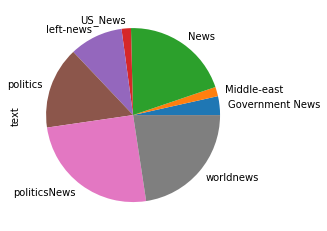

In [18]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind='pie')
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


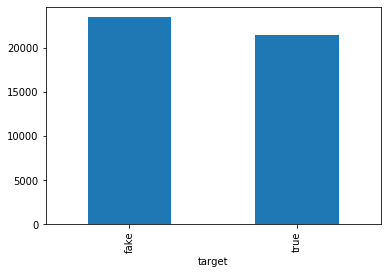

In [19]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind='bar')
plt.show()

In [20]:
# Most frequent words counter 
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'red')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

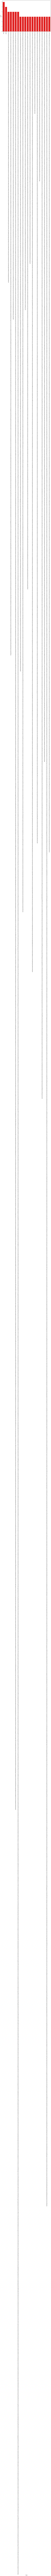

In [21]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

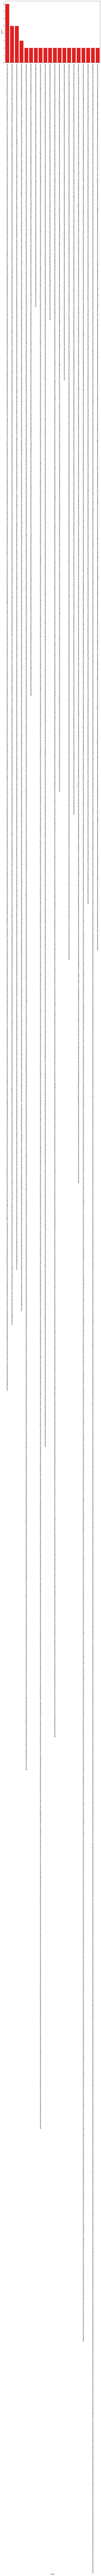

In [22]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [23]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Preparing the Data

In [24]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# Naive Bayes

In [25]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 69.69%


Confusion matrix, without normalization


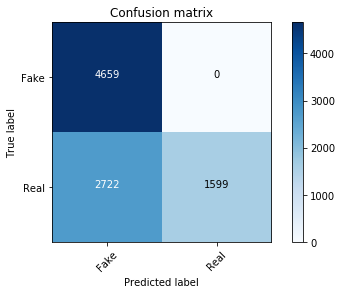

In [26]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistic Regression

In [27]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 68.14%


Confusion matrix, without normalization


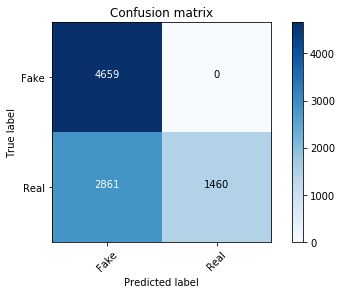

In [28]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 60.65%


Confusion matrix, without normalization


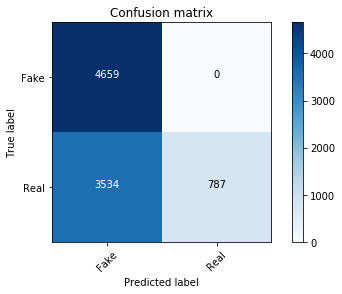

In [30]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest


In [31]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 65.6%


Confusion matrix, without normalization


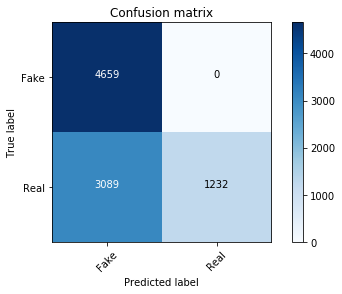

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [33]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 70.04%


Confusion matrix, without normalization


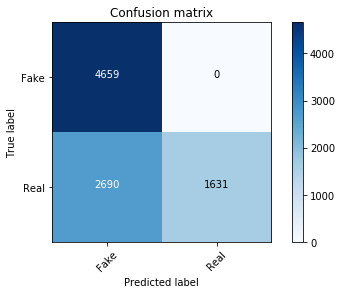

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comparing Different Models

([<matplotlib.axis.YTick at 0x1fdff6a4788>,
 <a list of 12 Text yticklabel objects>)

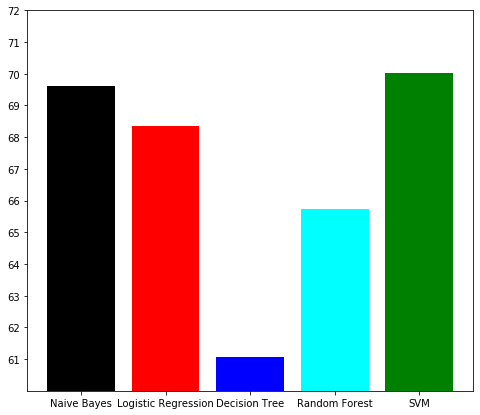

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()),color=['black','red','blue','cyan','green'])
plt.ylim(60,72)
plt.yticks((61, 62, 63, 64, 65, 66, 67, 68, 69, 70,71,72))